# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("bank-additional.csv", delimiter=";")
data.rename(columns={'y':'deposit'}, inplace=True)
data.head(8)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [26]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [27]:
data.shape

(4119, 21)

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [30]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [33]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [34]:
data.duplicated().sum()

0

In [35]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [36]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [37]:
cat_cols = data.select_dtypes(include= 'object').columns
print(cat_cols)

num_cols = data.select_dtypes(exclude = 'object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [38]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


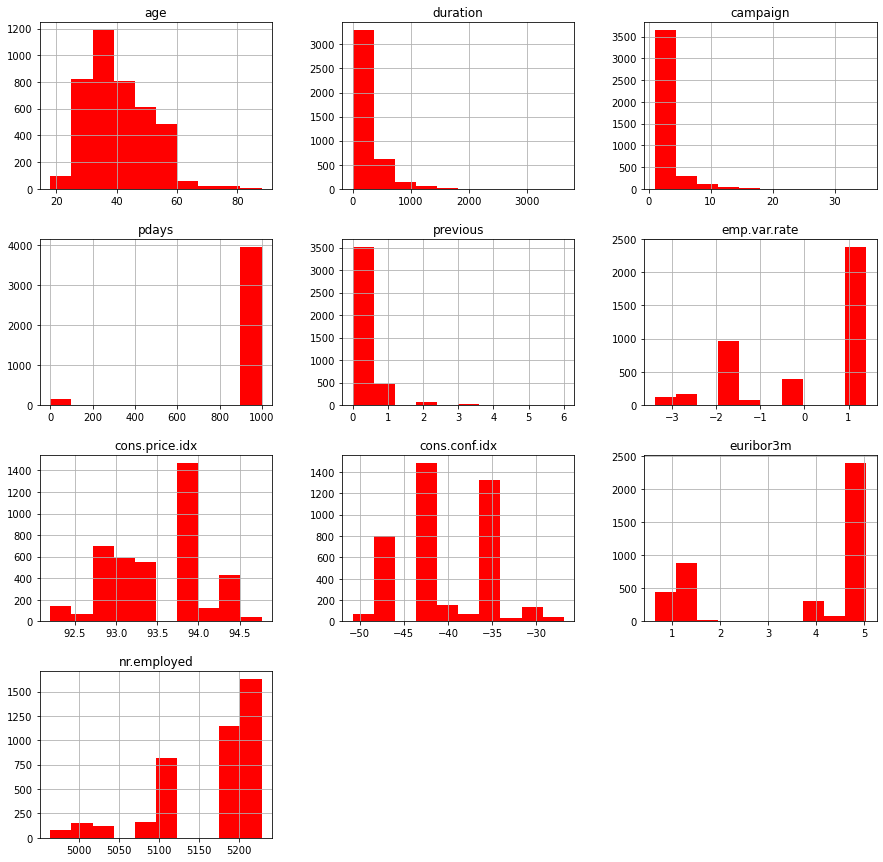

In [39]:
data.hist(figsize=(15,15), color='red')
plt.show()

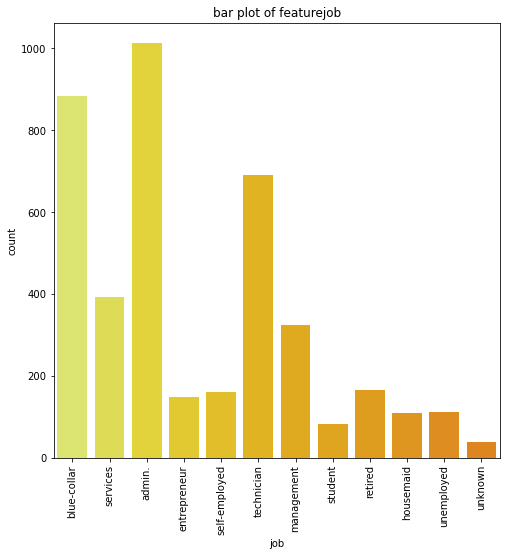

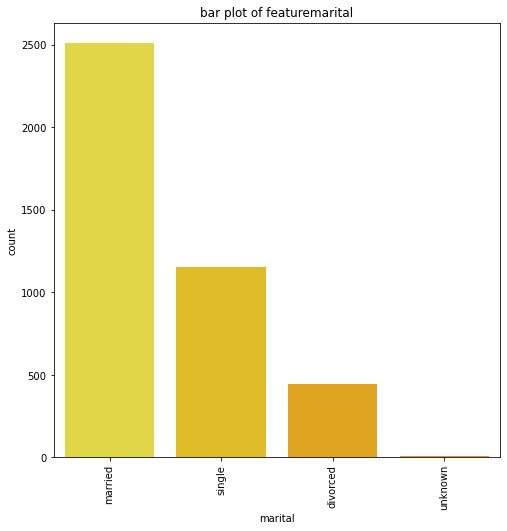

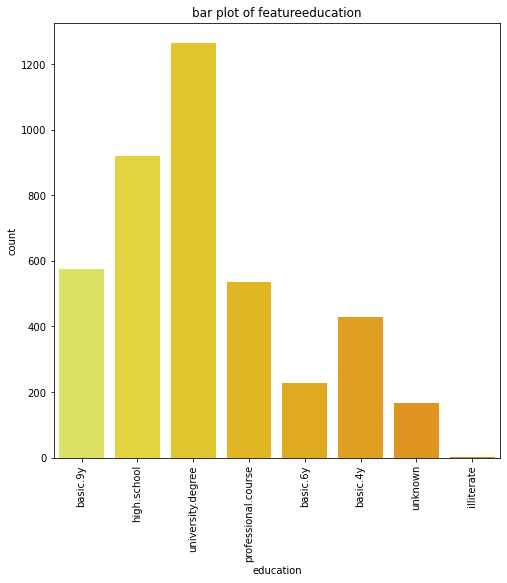

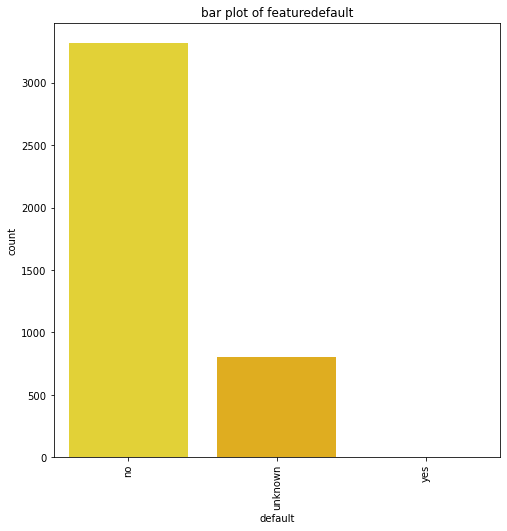

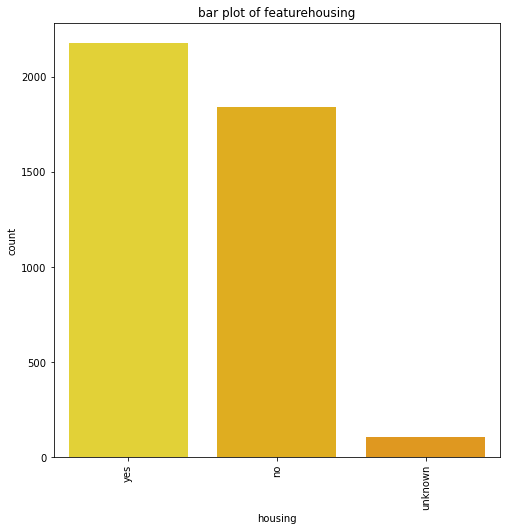

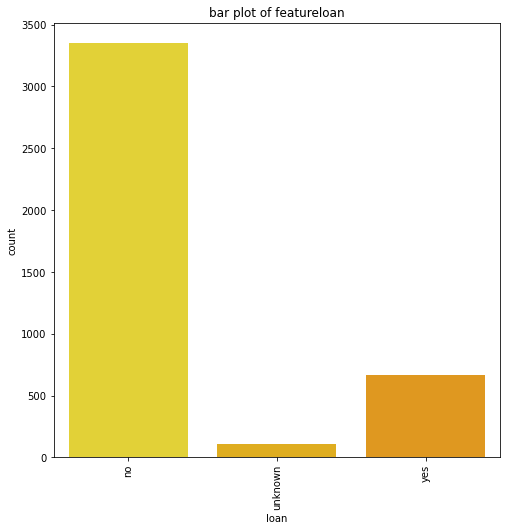

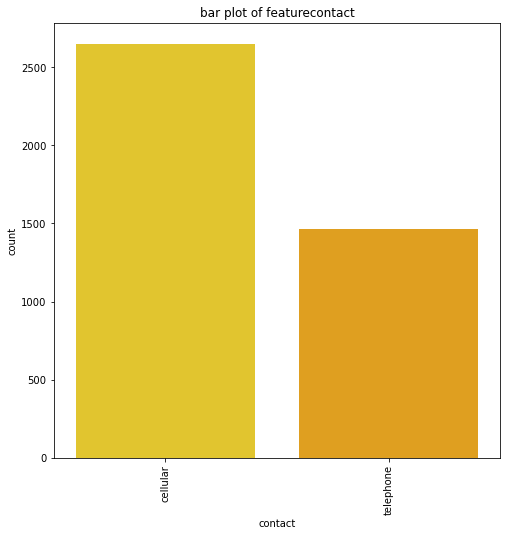

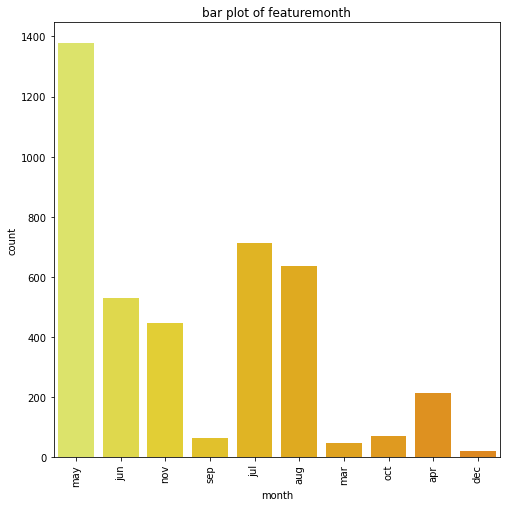

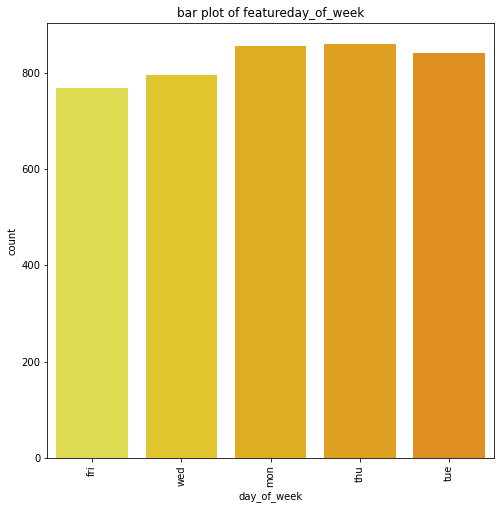

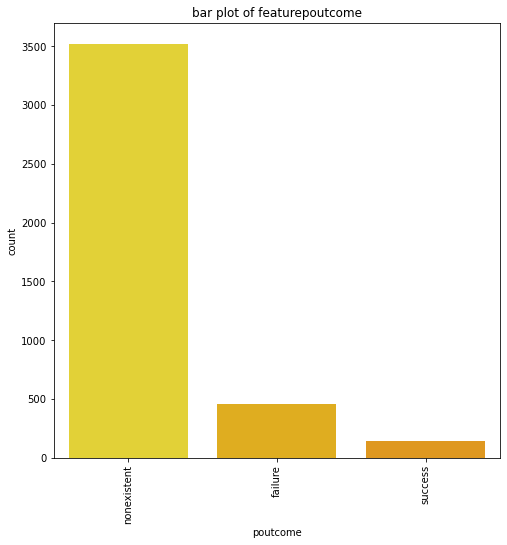

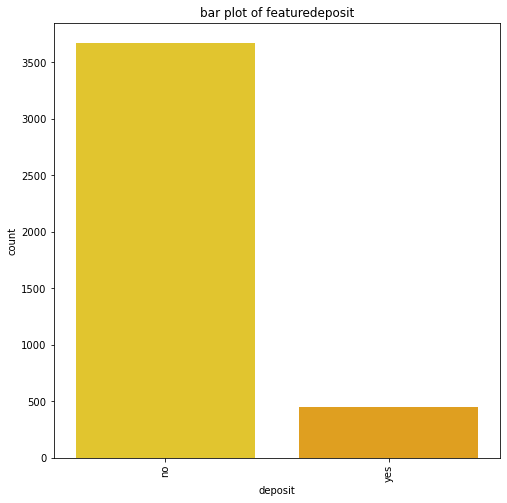

In [42]:
for feature in cat_cols:
    plt.figure(figsize=(8,8))
    sns.countplot(x=feature, data=data, palette ='Wistia')
    plt.title(f'bar plot of feature{feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

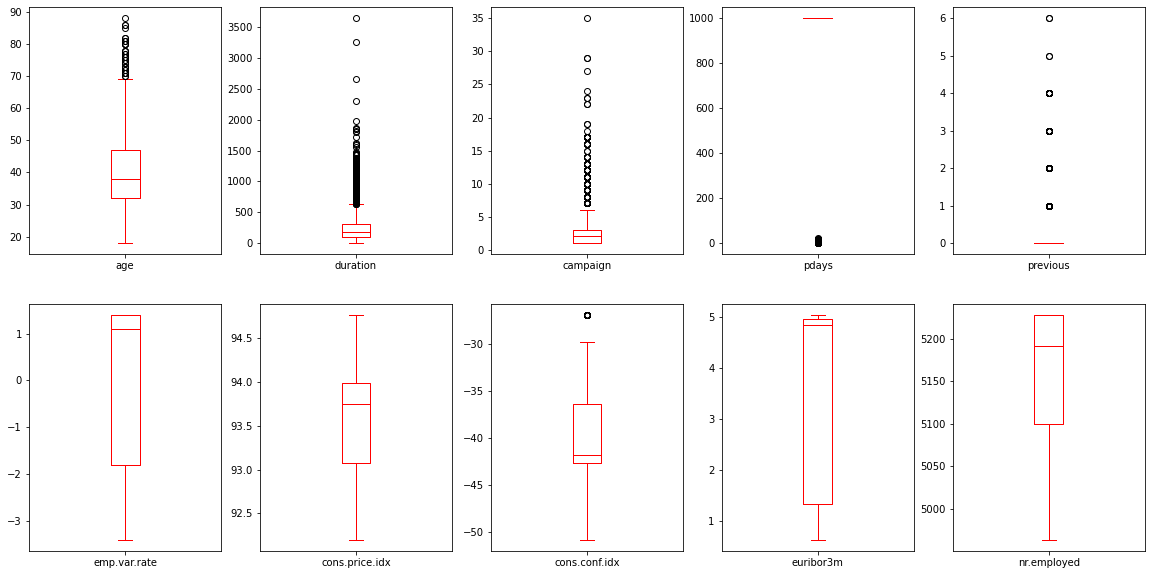

In [44]:
data.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='red')
plt.show()


In [47]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [48]:
data1 = data.copy()
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [49]:
data1.drop(high_corr_cols,inplace=True,axis=1)
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [50]:
data1.shape

(4119, 18)

In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data1.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [52]:
data_encoded['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

In [53]:
x = data_encoded.drop('deposit',axis=1)
y = data_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
print(4119*0.25)

1029.75


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
def eval_model(y_test,y_pred):
 acc = accuracy_score(y_test,y_pred)
 print('Accuracy_Score',acc)
 cm = confusion_matrix(y_test,y_pred)
 print('Confusion Matrix\n',cm)
 print('Classification Report\n',classification_report(y_test,y_pred))
def mscore(model):
 train_score = model.score(x_train,y_train)
 test_score = model.score(x_test,y_test)
 print('Training Score',train_score)
 print('Testing Score',test_score)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [61]:
mscore(dt)

Training Score 0.9271608934930399
Testing Score 0.8961165048543689


In [62]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 1]


In [63]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8961165048543689
Confusion Matrix
 [[897  22]
 [ 85  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       919
           1       0.54      0.23      0.33       111

    accuracy                           0.90      1030
   macro avg       0.73      0.61      0.64      1030
weighted avg       0.87      0.90      0.88      1030



In [64]:
from sklearn.tree import plot_tree

In [65]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


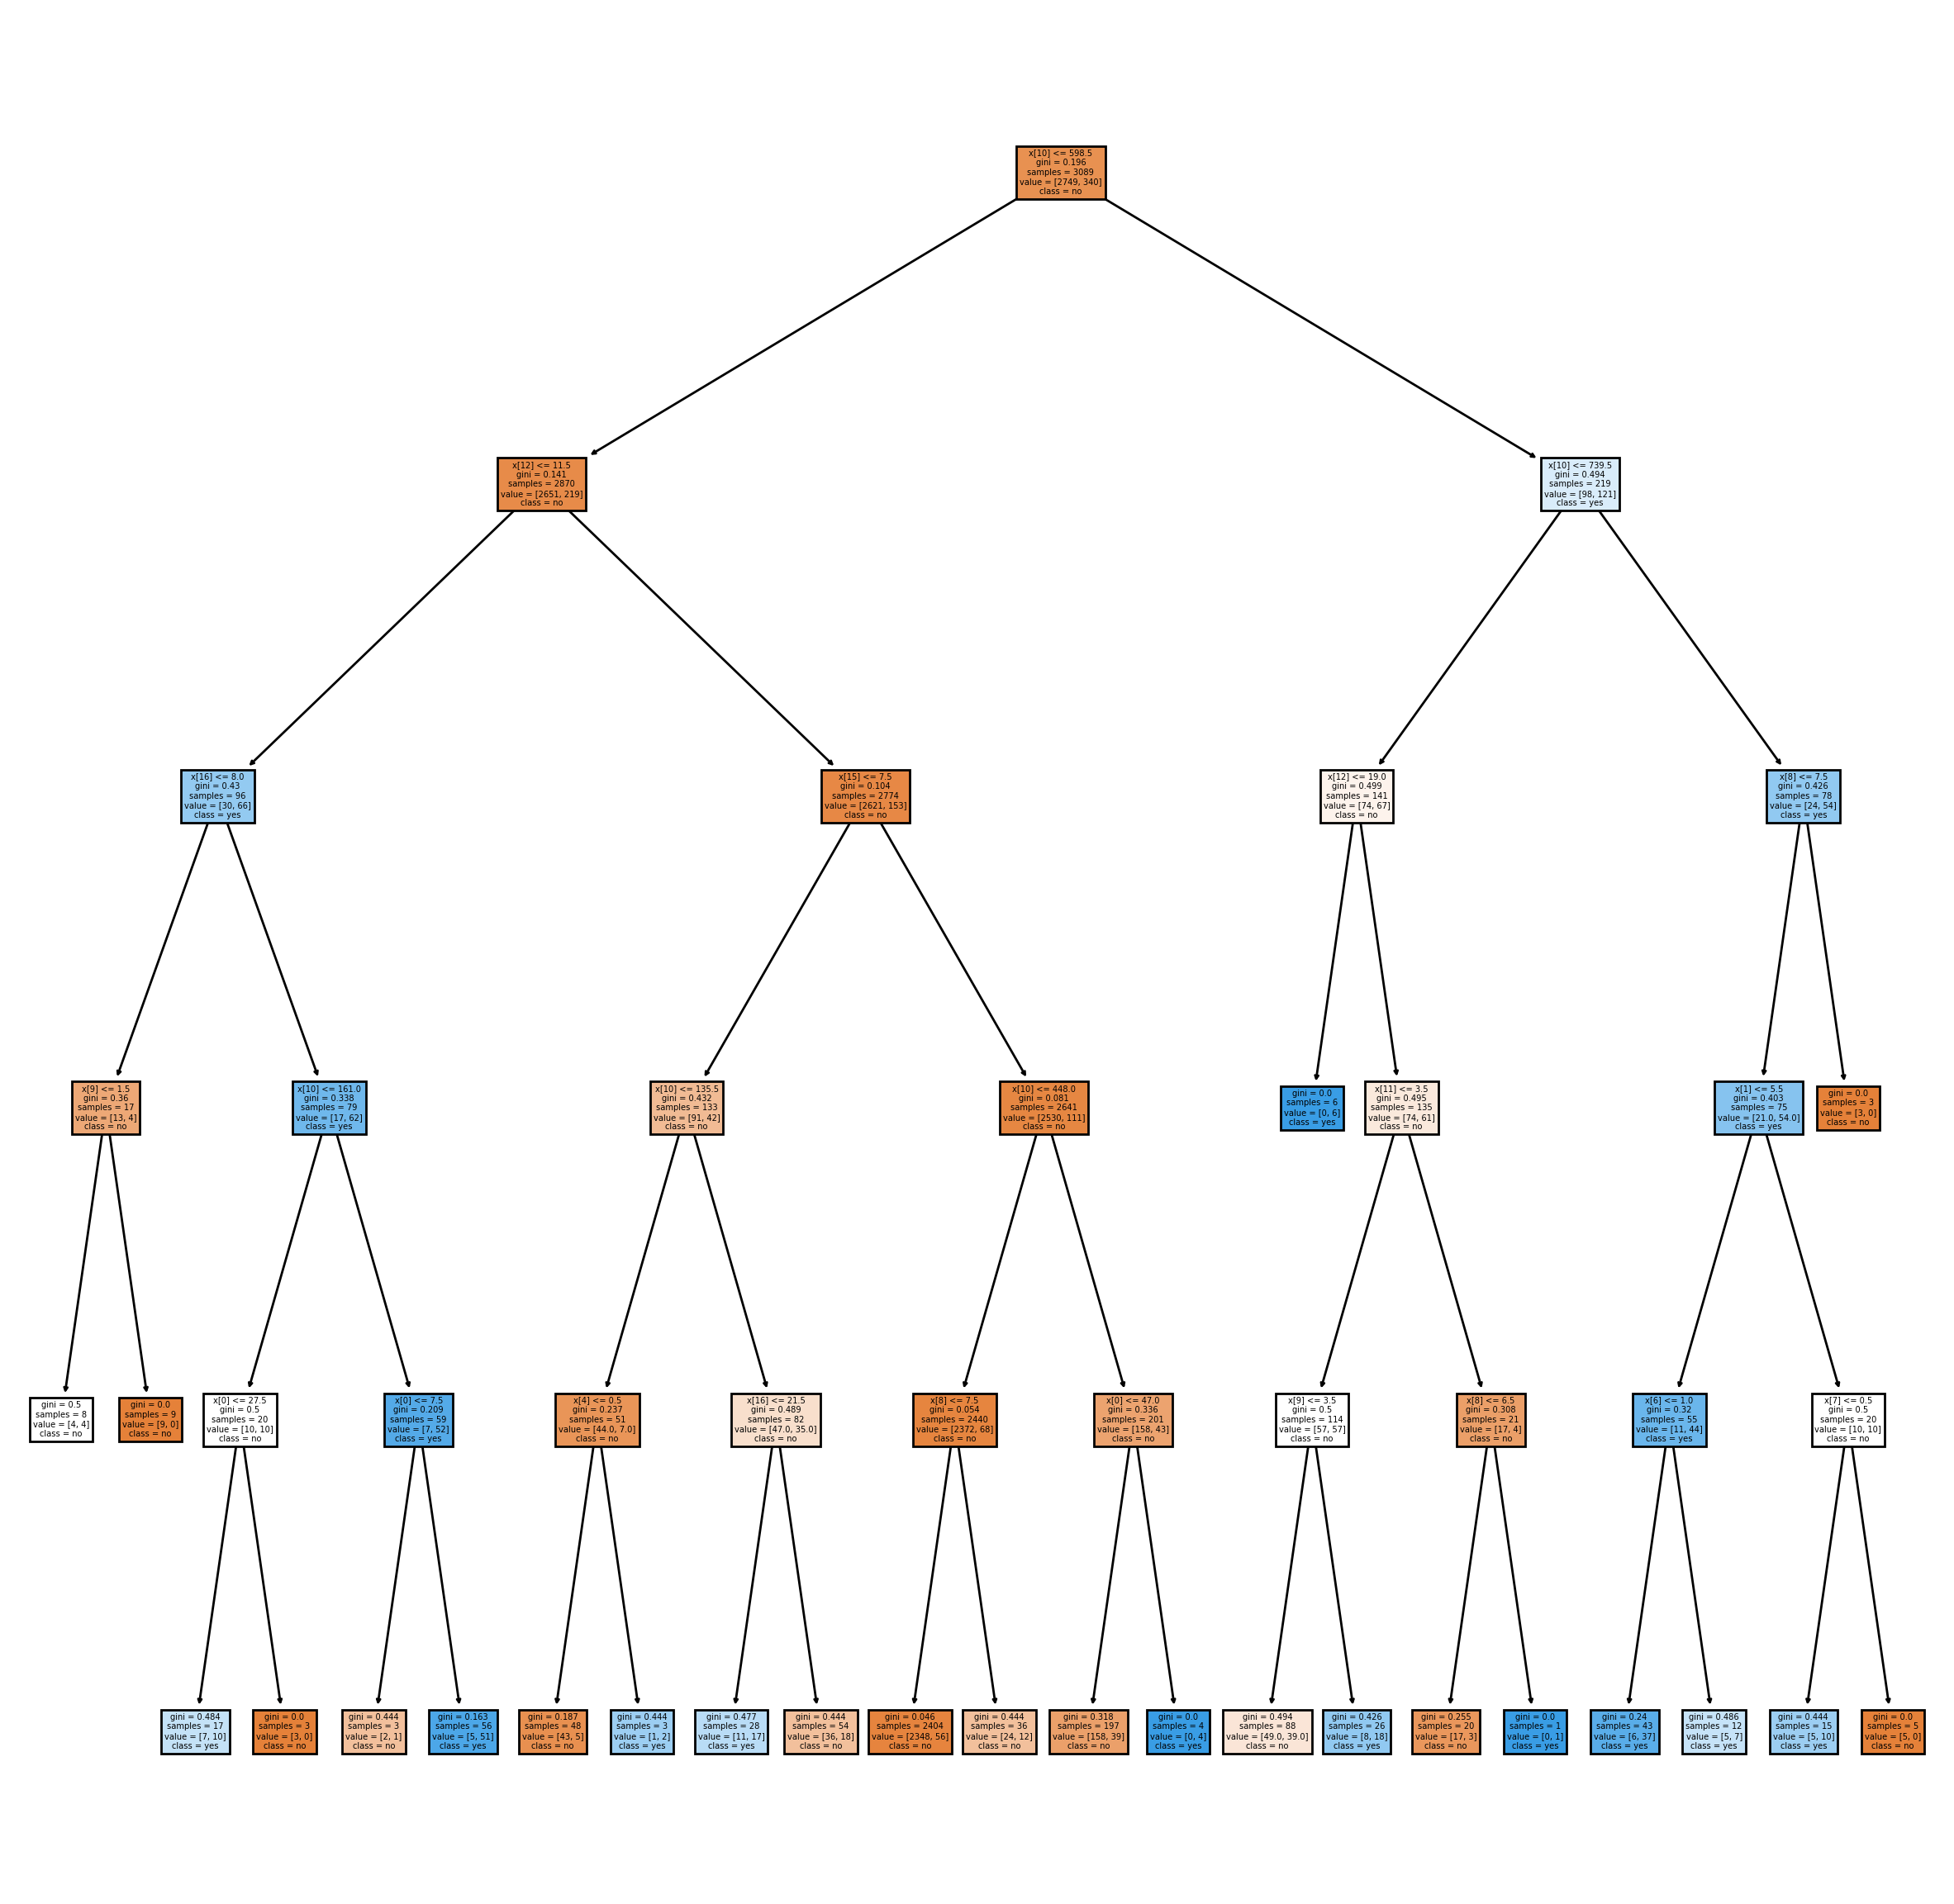

In [68]:
plt.figure(figsize=(15,15), dpi=200)
plot_tree(dt,feature_names=None,class_names=cn,filled=True)
plt.show()

In [73]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=20)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20)

In [74]:
mscore(dt1)

Training Score 0.9174490126254451
Testing Score 0.8990291262135922


In [75]:
ypred_dt1 = dt1.predict(x_test)

In [76]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8990291262135922
Confusion Matrix
 [[904  15]
 [ 89  22]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       919
           1       0.59      0.20      0.30       111

    accuracy                           0.90      1030
   macro avg       0.75      0.59      0.62      1030
weighted avg       0.88      0.90      0.88      1030



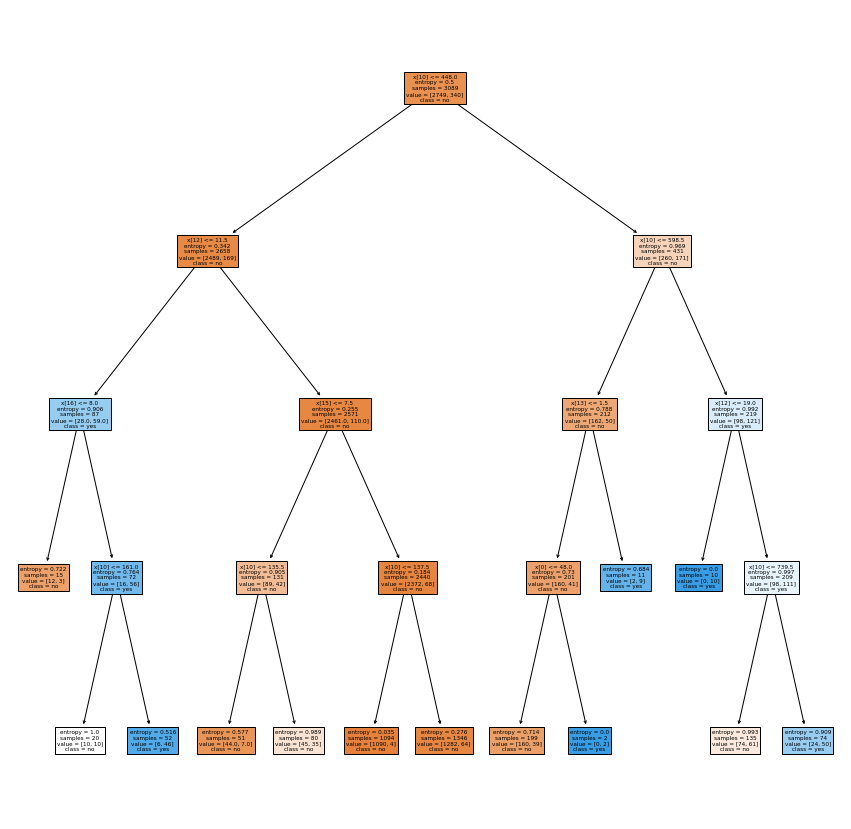

In [77]:
plt.figure(figsize=(15,15))
plot_tree(dt1,feature_names=None,class_names=cn,filled=True)
plt.show()